# Data Understanding and Initial Preprocessing

In [262]:
# Reading the data

import pandas as pd

df = pd.read_csv(r"D:\Guvi\Project\Employee_Attrition\data\Employee-Attrition.csv")
df.shape

(1470, 35)

In [263]:
print("Count of Null Values: ", df.isnull().sum().sum())

Count of Null Values:  0


Based on the above analysis, it was found that the dataset does not contain any null values.

In [264]:
# Finding Non-Predictive Columns

# Columns with only one unique value and ID columns
constant_value_cols = df.columns[df.nunique() == 1]
primary_key_cols = df.columns[df.nunique() == df.shape[0]]

# Print constant columns with their unique value
for col in constant_value_cols:
    print(col, "Unique Values :", df[col].unique()[0])

primary_key_cols

columns_to_drop = list(constant_value_cols) + list(primary_key_cols)
columns_to_drop

EmployeeCount Unique Values : 1
Over18 Unique Values : Y
StandardHours Unique Values : 80


['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

From the above analysis, it was found that EmployeeCount, Over18, and StandardHours have constant values. EmployeeNumber has unique values for each record. 

Therefore, these columns do not contribute to prediction and are considered non-predictive features. Hence, they are categorized under columns_to_drop and removed from the dataset.

In [265]:
# Remove Non-Predictive Columns

df_clean = df.drop(columns=columns_to_drop)

print("\nDataFrame shape brfore removing non-predictive columns:", df.shape[0], 'Rows', df.shape[1], 'columns.')
print("\nDataFrame shape after removing non-predictive columns :", df_clean.shape[0], 'Rows', df_clean.shape[1], 'columns.')


DataFrame shape brfore removing non-predictive columns: 1470 Rows 35 columns.

DataFrame shape after removing non-predictive columns : 1470 Rows 31 columns.


In [266]:
# Defining the feature and target columns

target = 'Attrition'
features = df_clean.drop(columns='Attrition')

df_clean[target] = df_clean[target].map({'Yes': 1, 'No': 0})

print("df_clean total columns count :", df_clean.shape[1])
print("Feature columns count :", features.shape[1])
print("Target column count  :", 1)


df_clean total columns count : 31
Feature columns count : 30
Target column count  : 1


In [267]:
# understanding the feature columns
df_clean.nunique().sort_values()

Attrition                      2
Gender                         2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
BusinessTravel                 3
Department                     3
JobInvolvement                 4
StockOptionLevel               4
RelationshipSatisfaction       4
EnvironmentSatisfaction        4
WorkLifeBalance                4
JobSatisfaction                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRat

In [268]:
numerical_cols = features.columns[features.nunique() >= 10]
categorical_cols = features.columns[features.nunique() < 10]

print("Numarical columns", len(numerical_cols), ":", numerical_cols.tolist())
print("Categorical columns", len(categorical_cols), ":", categorical_cols.tolist())

Numarical columns 13 : ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical columns 17 : ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


### **Based on the above analysis, features were classified using the number of unique values.**

### Numerical Features (Features with 10 or more unique values)

- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Categorical Features (Features with less than 10 unique values)

- BusinessTravel
- Department
- Education
- EducationField
- EnvironmentSatisfaction
- Gender
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- OverTime
- PerformanceRating
- RelationshipSatisfaction
- StockOptionLevel
- TrainingTimesLastYear
- WorkLifeBalance

# EDA

## Normality Test: Shapiro

In [269]:
# Normality Test: Shapiro

from scipy.stats import shapiro
import pandas as pd

for col in numerical_cols:
    
    stat, p_value = shapiro(df_clean[col])

    print(f"{col:<25} | p-value: {p_value:>10.6f} | "
          f"{'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'}")


Age                       | p-value:   0.000000 | Not Normally Distributed
DailyRate                 | p-value:   0.000000 | Not Normally Distributed
DistanceFromHome          | p-value:   0.000000 | Not Normally Distributed
HourlyRate                | p-value:   0.000000 | Not Normally Distributed
MonthlyIncome             | p-value:   0.000000 | Not Normally Distributed
MonthlyRate               | p-value:   0.000000 | Not Normally Distributed
NumCompaniesWorked        | p-value:   0.000000 | Not Normally Distributed
PercentSalaryHike         | p-value:   0.000000 | Not Normally Distributed
TotalWorkingYears         | p-value:   0.000000 | Not Normally Distributed
YearsAtCompany            | p-value:   0.000000 | Not Normally Distributed
YearsInCurrentRole        | p-value:   0.000000 | Not Normally Distributed
YearsSinceLastPromotion   | p-value:   0.000000 | Not Normally Distributed
YearsWithCurrManager      | p-value:   0.000000 | Not Normally Distributed


The Shapiro test results show that all numerical features have p-values less than 0.05. This means none of the numerical variables are normally distributed. Such behavior is common in real-world HR datasets

---

## Univeriate analysis


===== Numeric Feature: Age =====
Mean: 36.92  | Median: 36.0
Mean-Median Difference %: 2.5 %
Skewness: 0.41


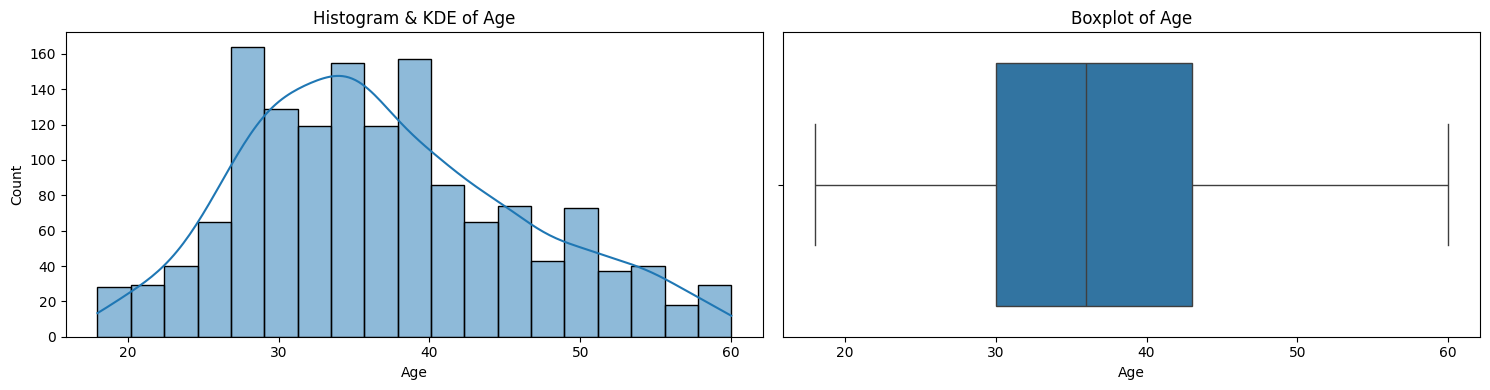


===== Numeric Feature: DailyRate =====
Mean: 802.49  | Median: 802.0
Mean-Median Difference %: 0.06 %
Skewness: -0.0


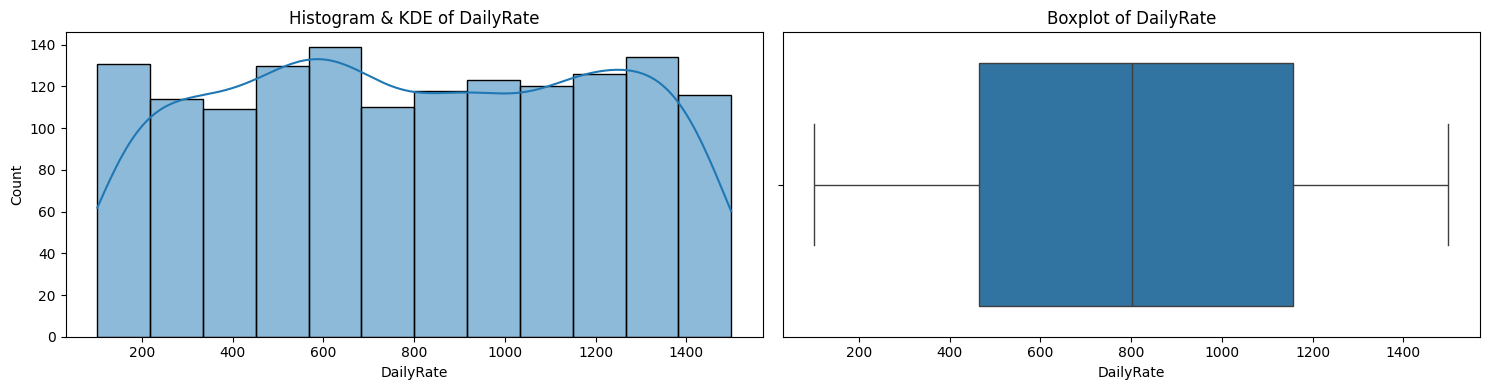


===== Numeric Feature: DistanceFromHome =====
Mean: 9.19  | Median: 7.0
Mean-Median Difference %: 23.85 %
Skewness: 0.96


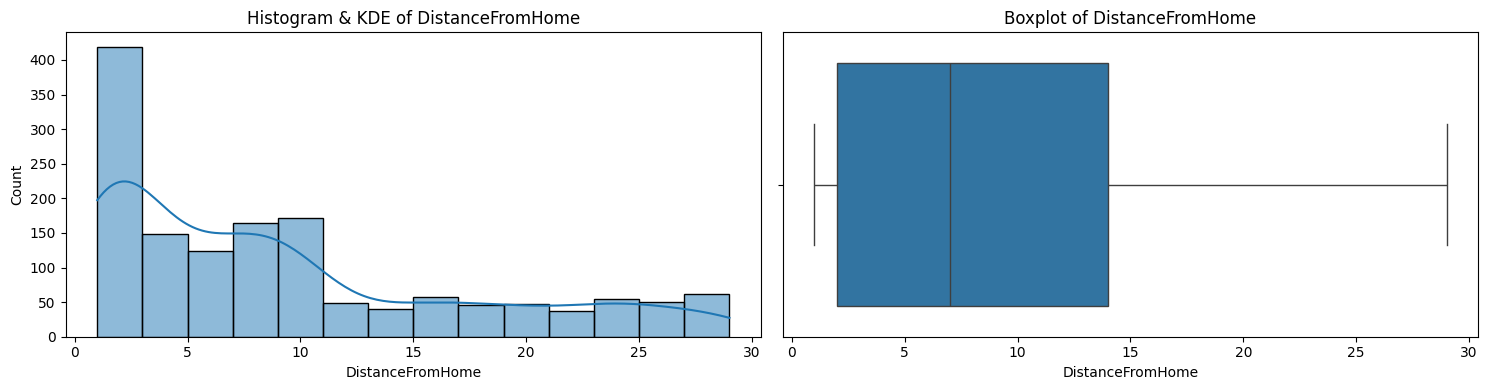


===== Numeric Feature: HourlyRate =====
Mean: 65.89  | Median: 66.0
Mean-Median Difference %: 0.17 %
Skewness: -0.03


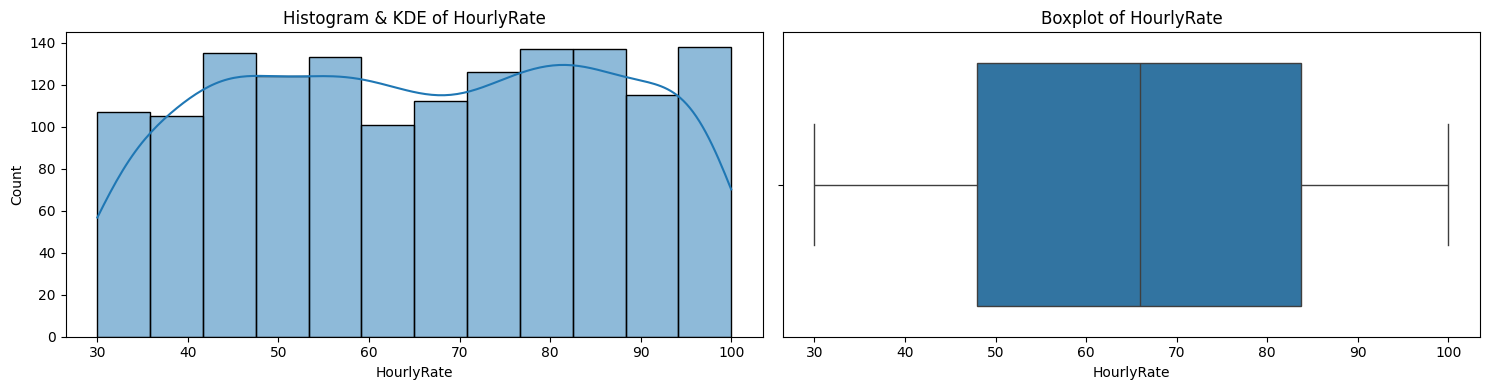


===== Numeric Feature: MonthlyIncome =====
Mean: 6502.93  | Median: 4919.0
Mean-Median Difference %: 24.36 %
Skewness: 1.37


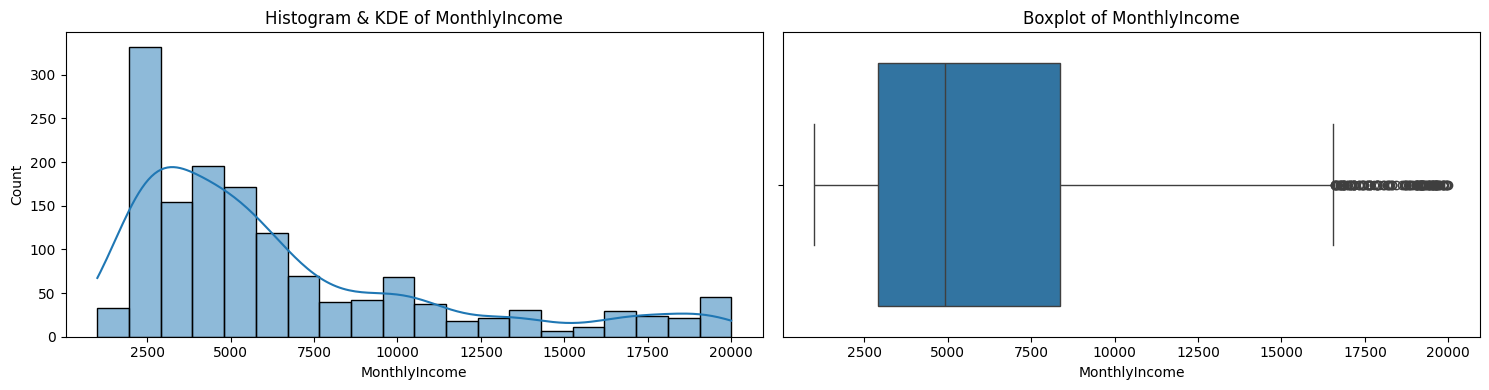


===== Numeric Feature: MonthlyRate =====
Mean: 14313.1  | Median: 14235.5
Mean-Median Difference %: 0.54 %
Skewness: 0.02


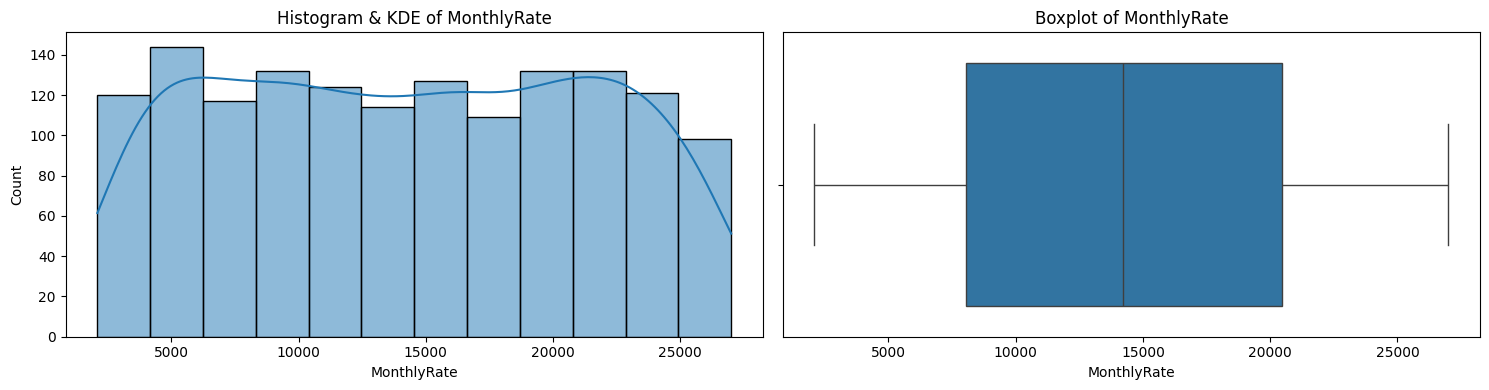


===== Numeric Feature: NumCompaniesWorked =====
Mean: 2.69  | Median: 2.0
Mean-Median Difference %: 25.74 %
Skewness: 1.03


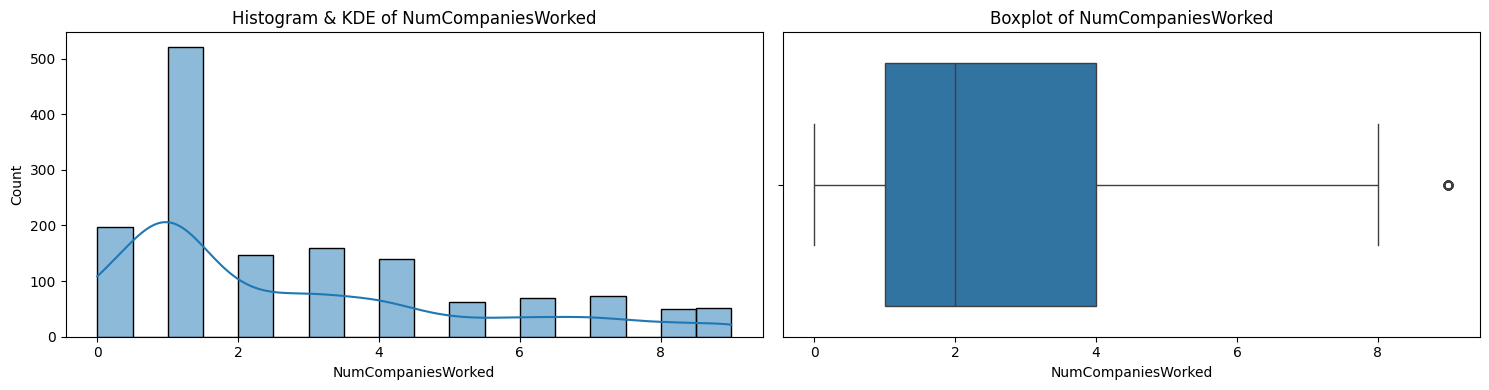


===== Numeric Feature: PercentSalaryHike =====
Mean: 15.21  | Median: 14.0
Mean-Median Difference %: 7.95 %
Skewness: 0.82


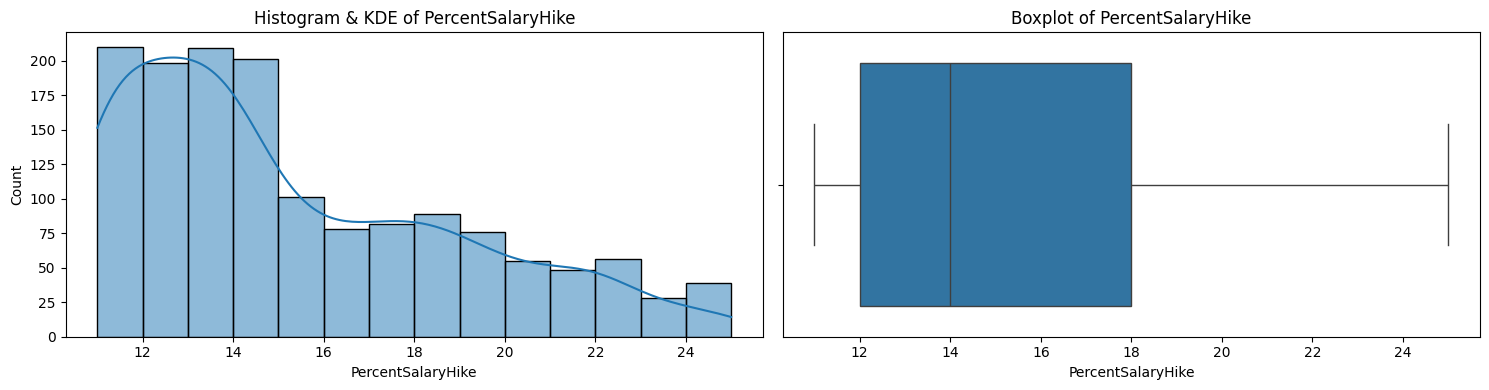


===== Numeric Feature: TotalWorkingYears =====
Mean: 11.28  | Median: 10.0
Mean-Median Difference %: 11.34 %
Skewness: 1.12


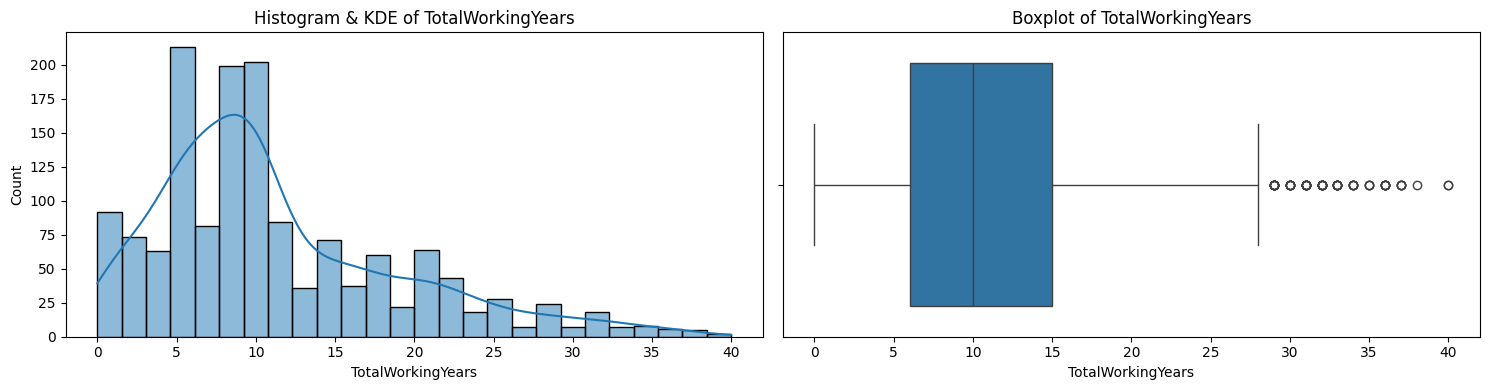


===== Numeric Feature: YearsAtCompany =====
Mean: 7.01  | Median: 5.0
Mean-Median Difference %: 28.65 %
Skewness: 1.76


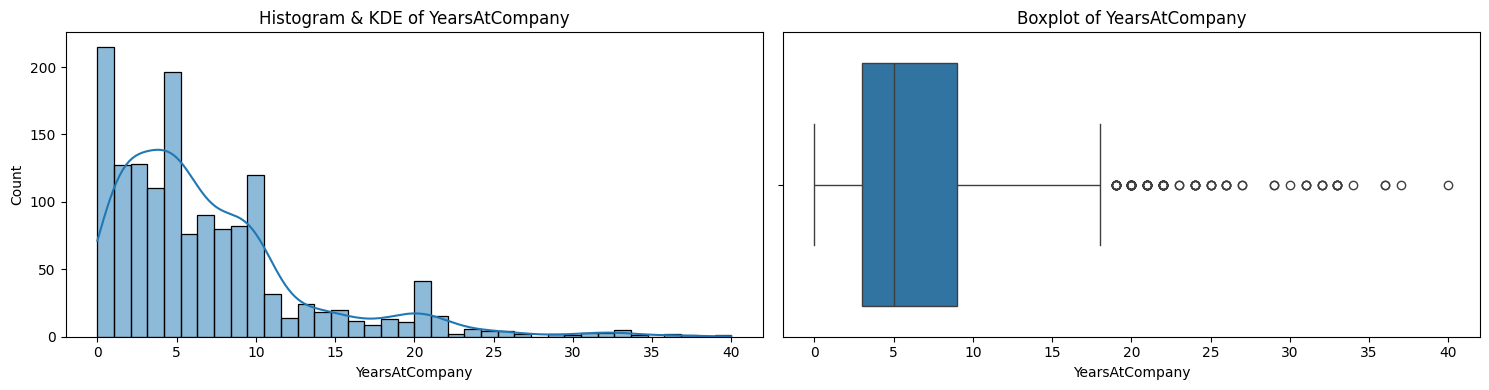


===== Numeric Feature: YearsInCurrentRole =====
Mean: 4.23  | Median: 3.0
Mean-Median Difference %: 29.07 %
Skewness: 0.92


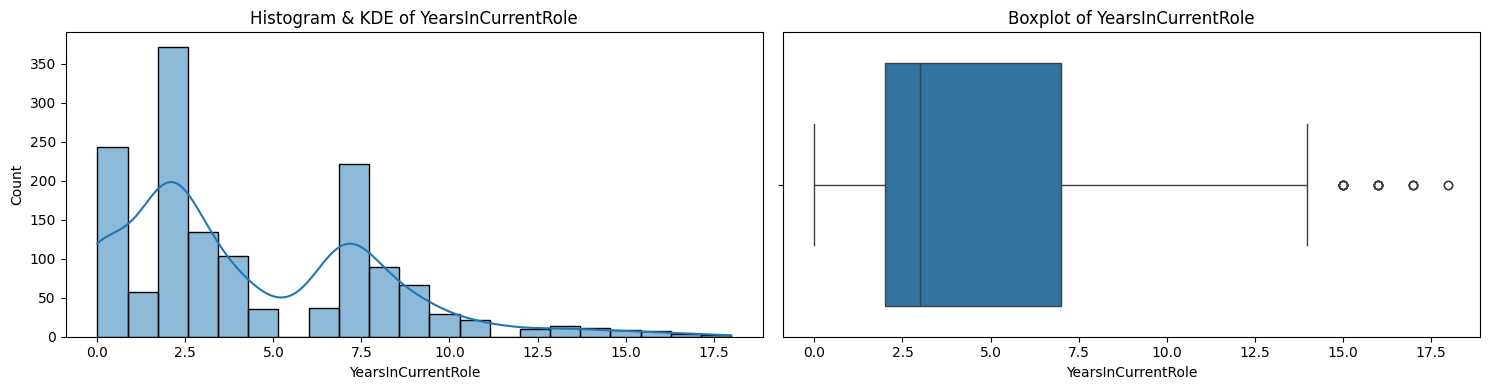


===== Numeric Feature: YearsSinceLastPromotion =====
Mean: 2.19  | Median: 1.0
Mean-Median Difference %: 54.29 %
Skewness: 1.98


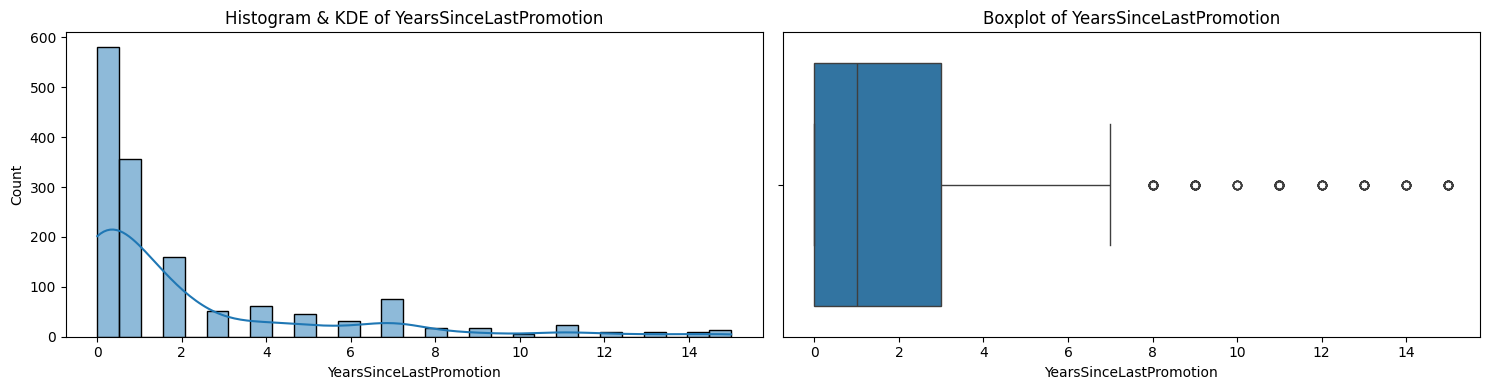


===== Numeric Feature: YearsWithCurrManager =====
Mean: 4.12  | Median: 3.0
Mean-Median Difference %: 27.24 %
Skewness: 0.83


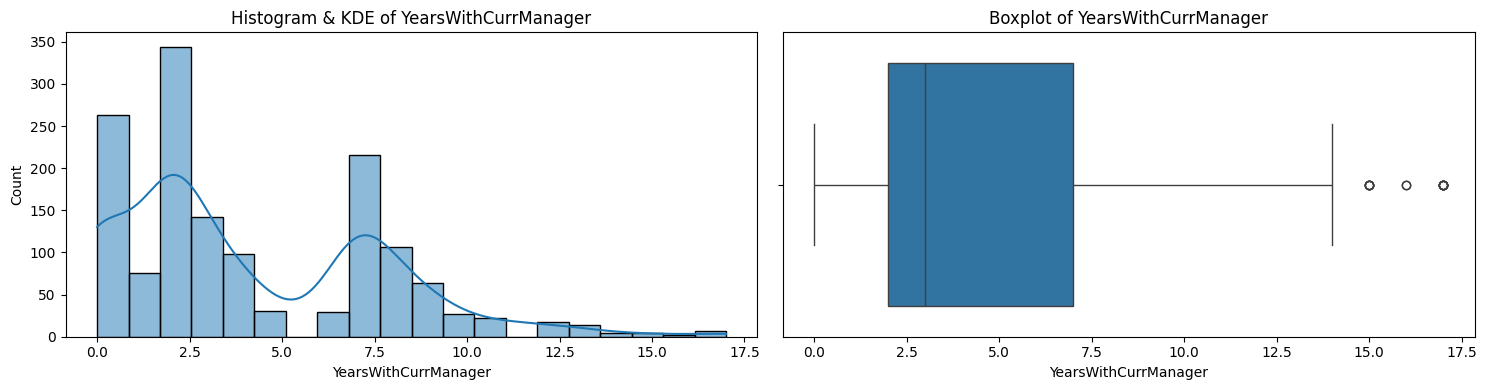

In [270]:
# Univariate Analysis - Numeric Features
import matplotlib.pyplot as plt
import seaborn as sns   

for col in numerical_cols:
    print(f"\n===== Numeric Feature: {col} =====")

    # Mean, Median, Difference %
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    diff_percent = abs(mean_val - median_val) / mean_val * 100
    
    print("Mean:", round(mean_val, 2), 
          " | Median:", round(median_val, 2))
    
    print("Mean-Median Difference %:", round(diff_percent, 2), "%")

    # Skewness
    skew_val = df_clean[col].skew()
    print("Skewness:", round(skew_val, 2))

    
    # 2 Subplots (Histogram + Boxplot)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))

    # Histogram + KDE
    sns.histplot(df_clean[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram & KDE of {col}")

    # Boxplot
    sns.boxplot(x=df_clean[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


**Based on the EDA analysis, none of the numerical features are normally distributed.**
- Several numerical features contain outliers, including:
  - MonthlyIncome
  - NumCompaniesWorked
  - TotalWorkingYears
  - YearsAtCompany
  - YearsInCurrentRole
  - YearsSinceLastPromotion
  - YearsWithCurrManager

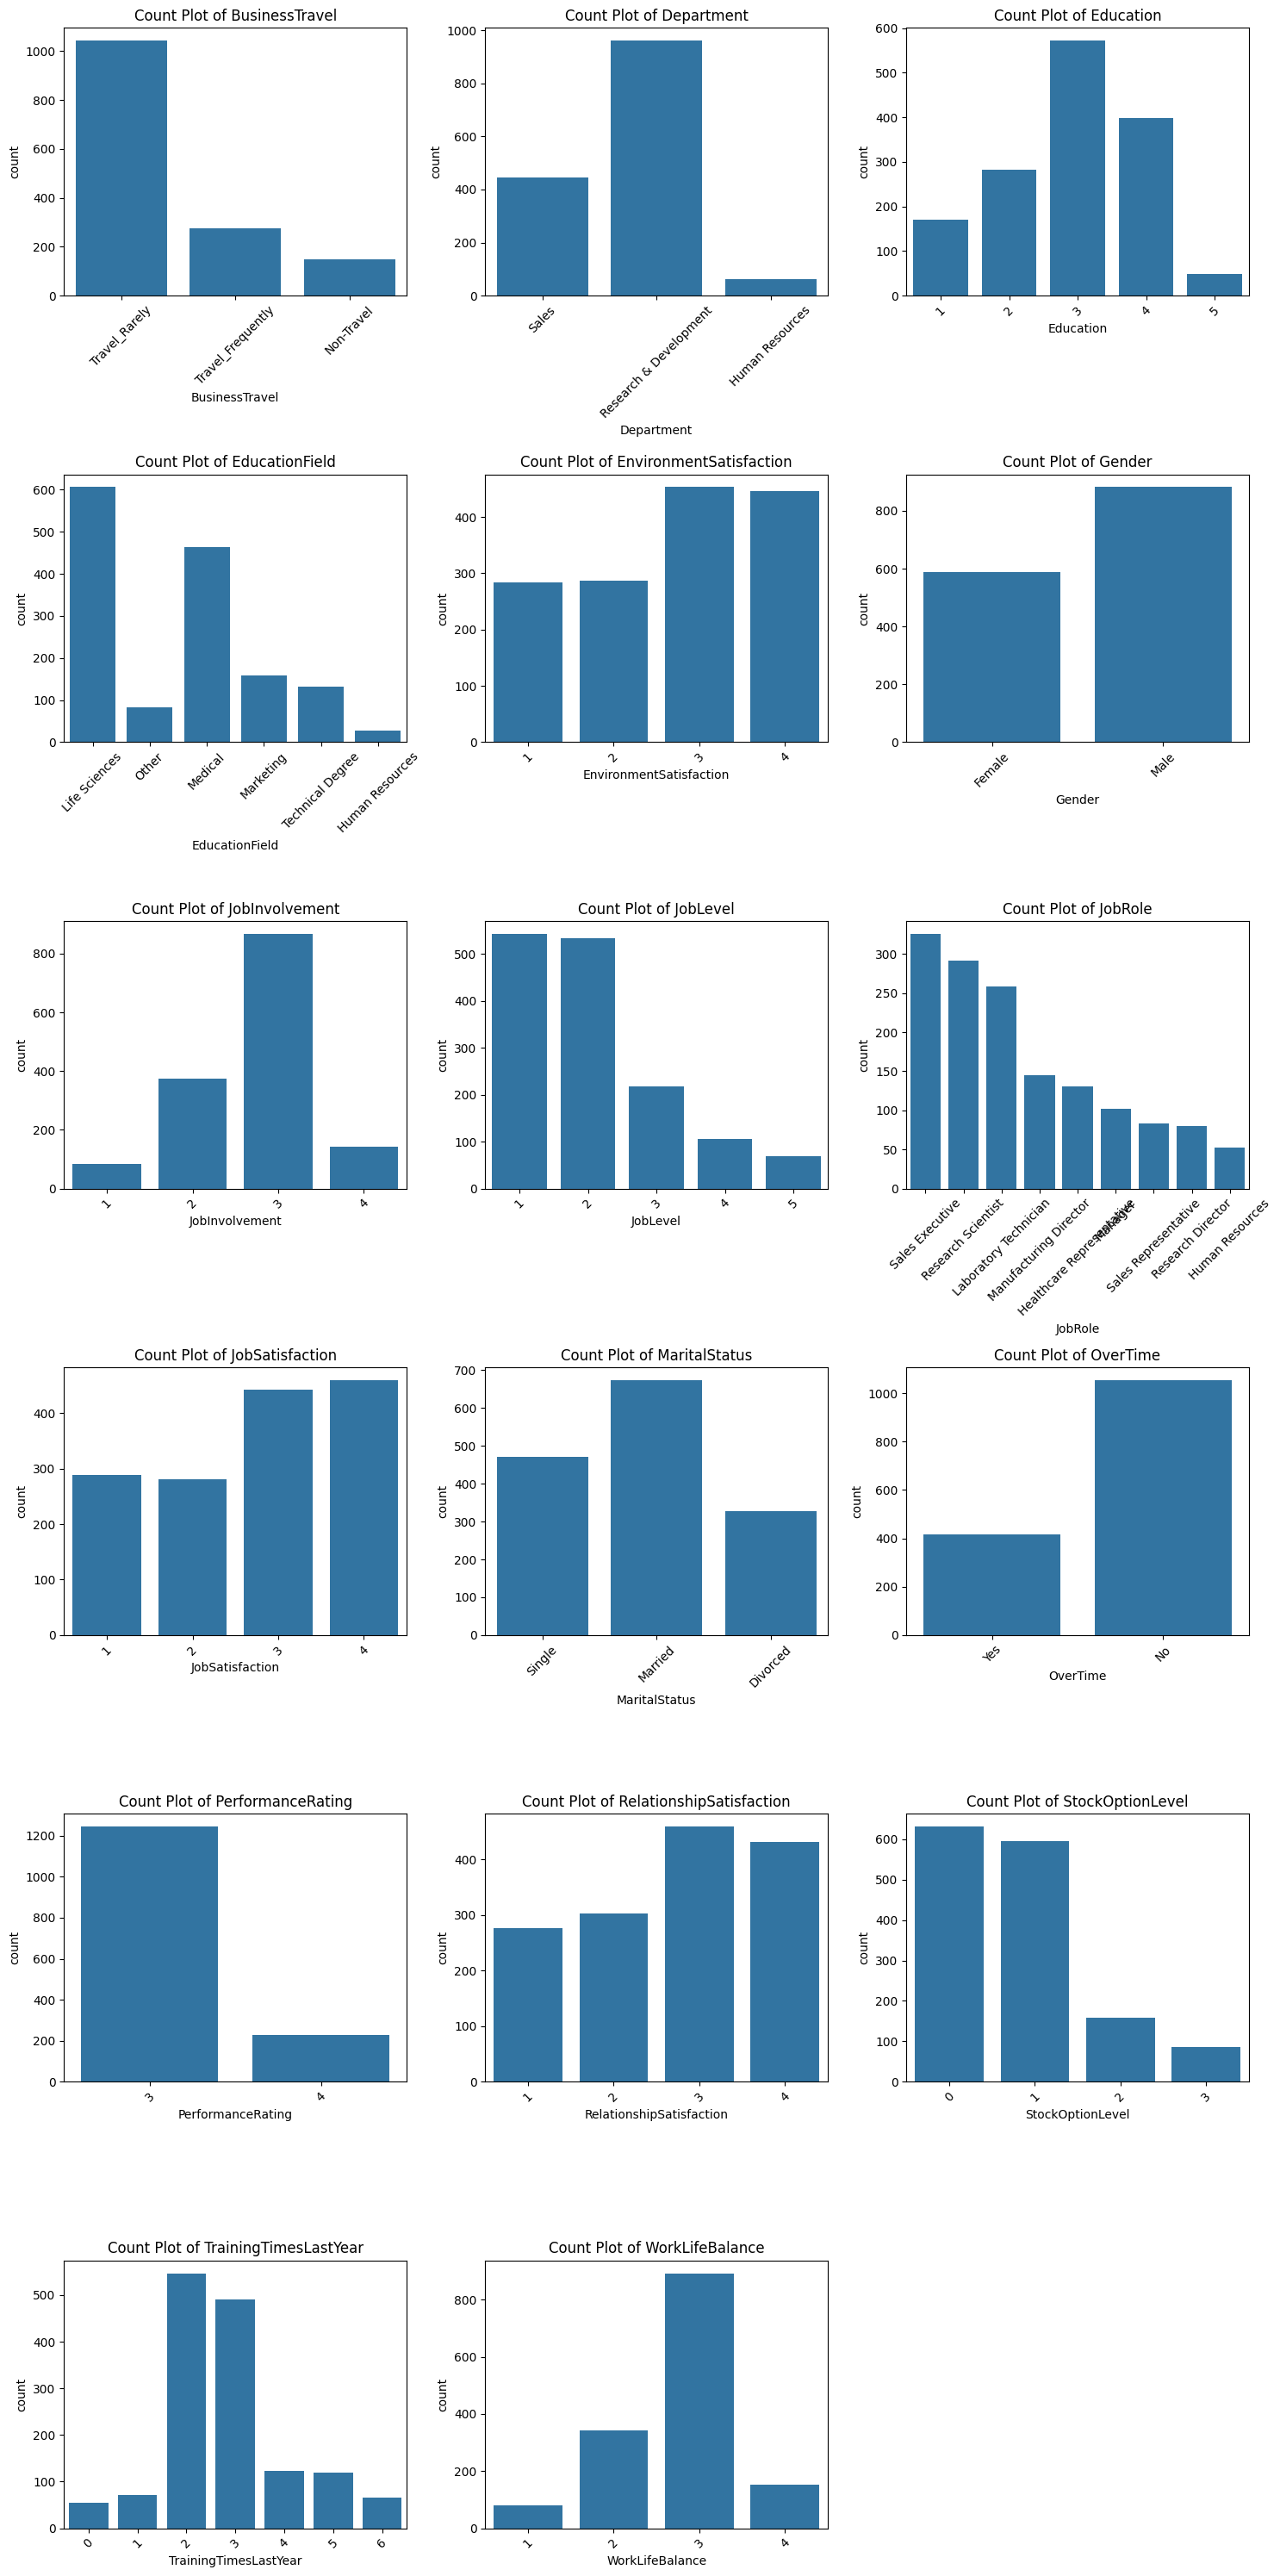

In [271]:
#Univariate analysis for categorical_cols:

plt.figure(figsize=(15, 30))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df_clean, x=col)
    plt.title(f"Count Plot of {col}", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

From the charts, we can see that most employees fall into a few common groups. Many employees work in Research & Development, are in lower job levels, and report medium to high job satisfaction and involvement. Some categories, such as Human Resources, higher job levels, and certain job roles, have very few employees. Overall, the data is not evenly spread, and a small number of categories dominate the dataset.

----

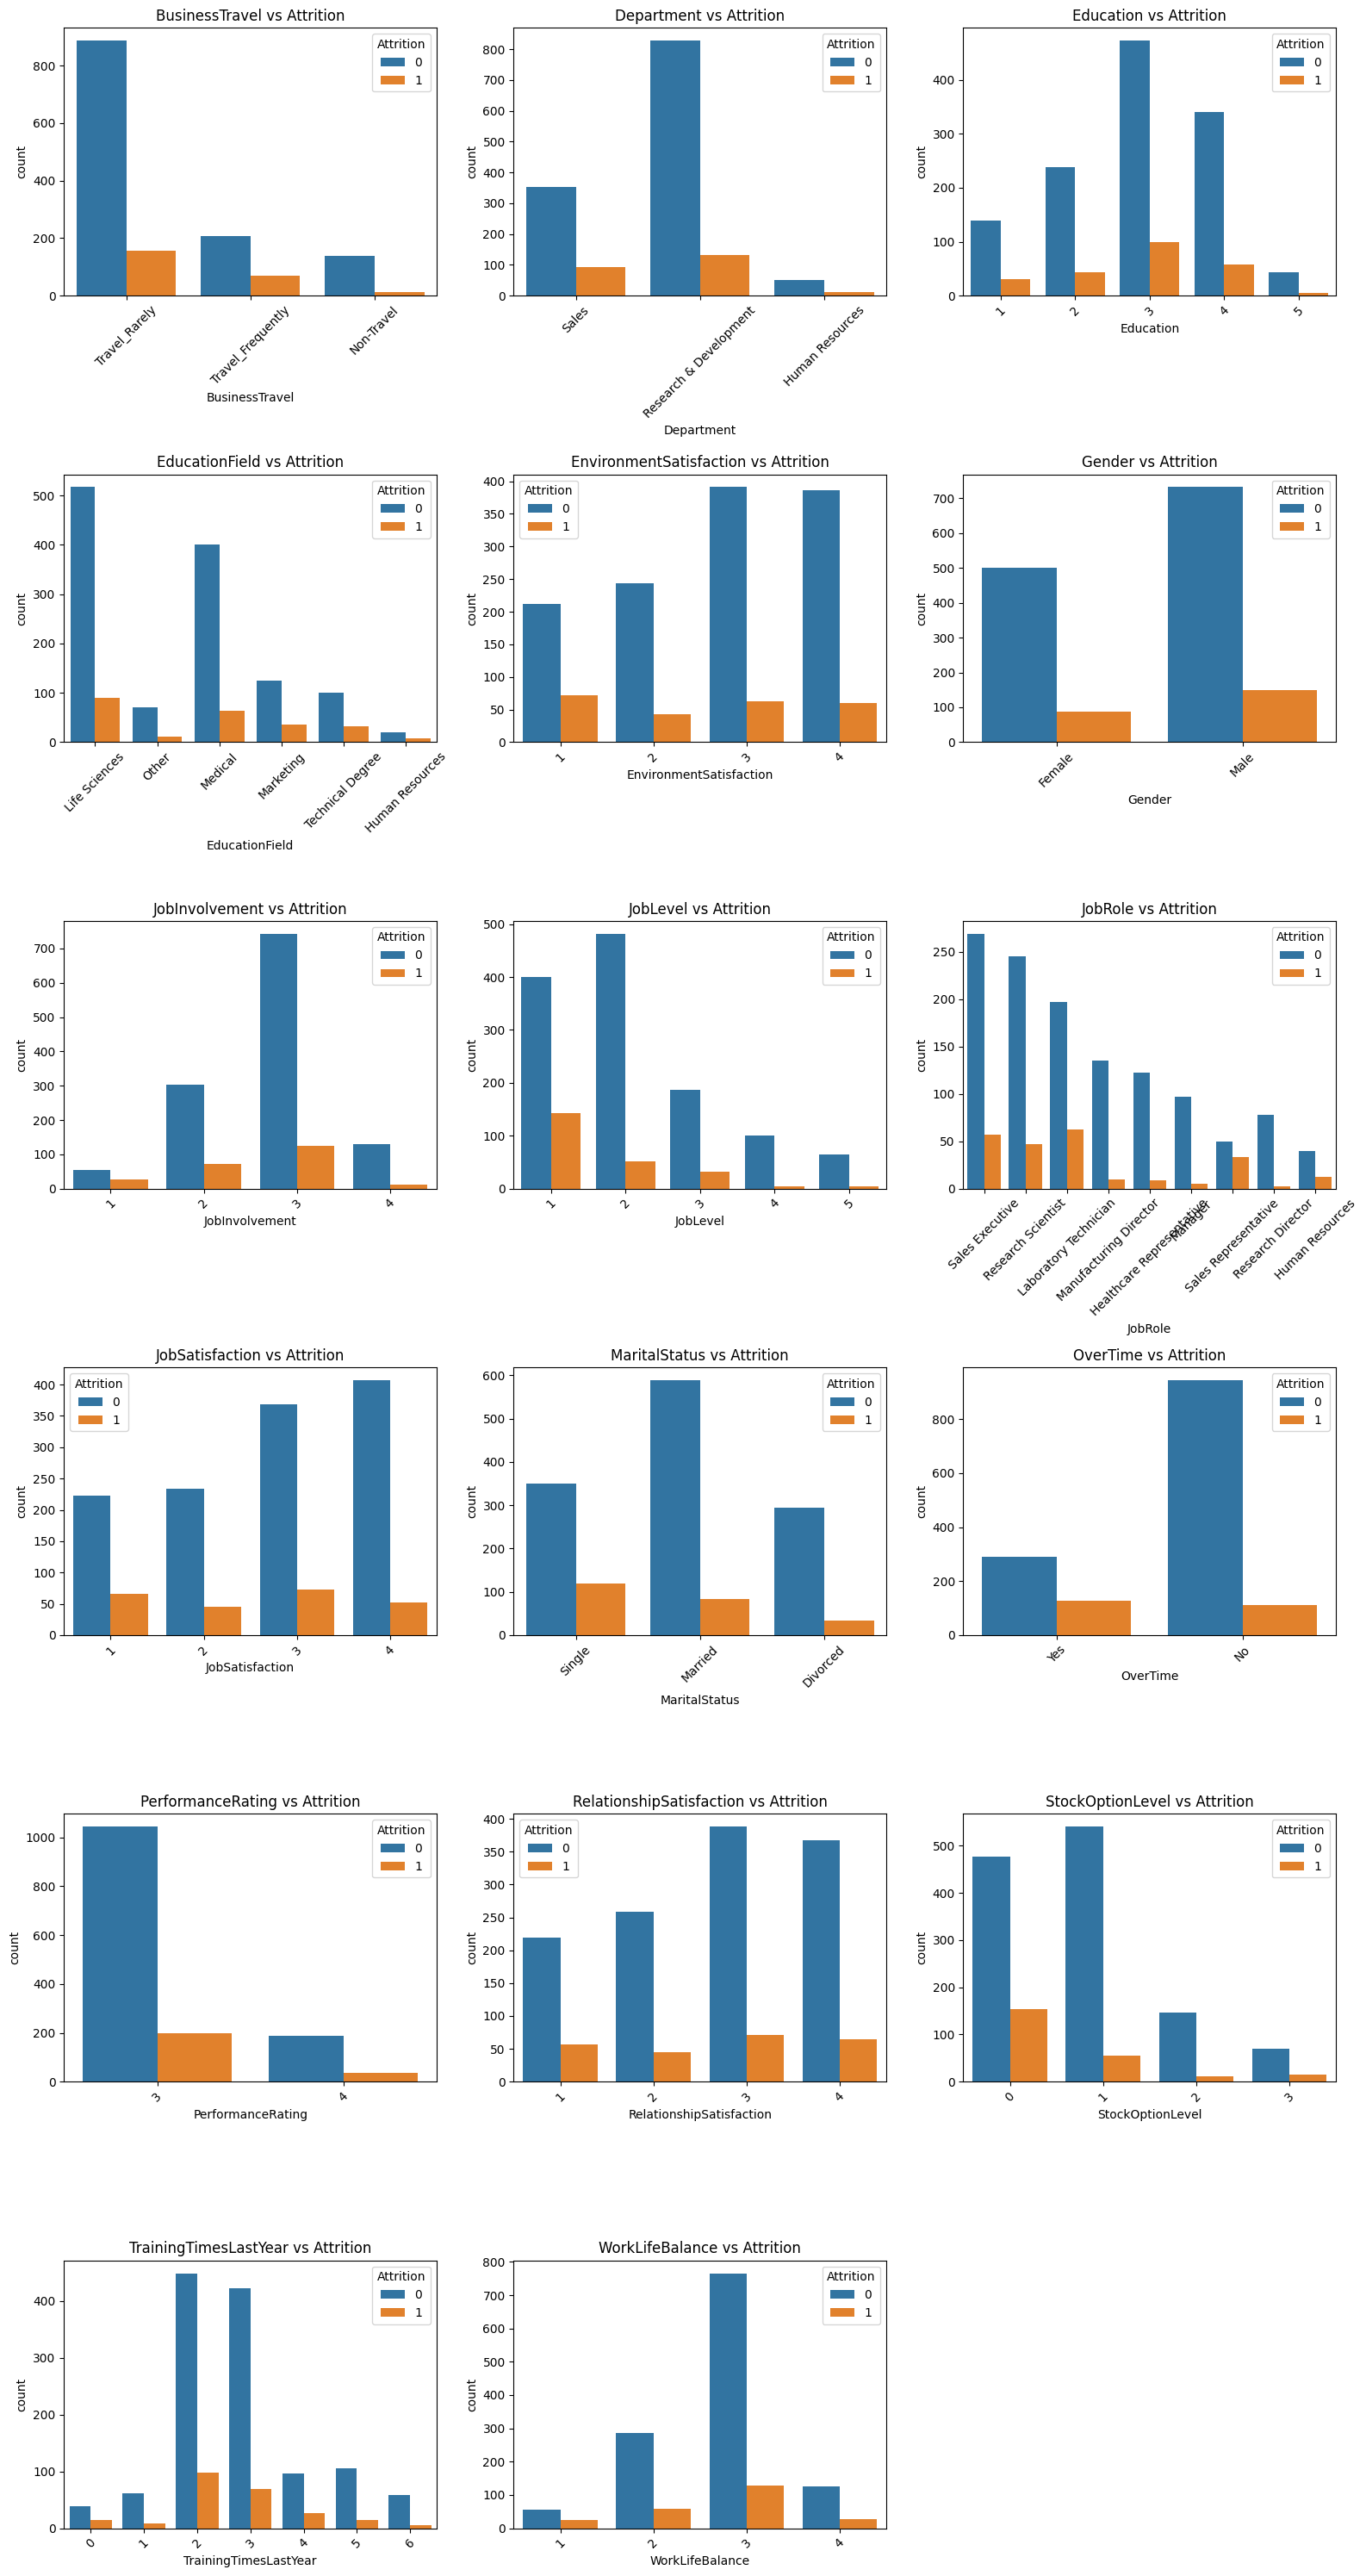

In [272]:
#Bivariate analysis for categorical_cols:


plt.figure(figsize=(16, 30))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)  
    sns.countplot(data=df_clean, x=col, hue=target)
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


From the charts, employees who travel frequently, work overtime, and are in lower job levels tend to show higher attrition compared to others. Attrition is also more noticeable among employees with lower job involvement, lower job satisfaction, and poorer work–life balance. Certain departments and job roles show more attrition mainly because they have more employees. Overall, the charts suggest that work conditions and employee engagement play a bigger role in attrition than demographic factors like gender or education.

---

### Detailed Inference from Categorical Features vs Attrition

### BusinessTravel
- Employees who travel **frequently** show higher attrition compared to those who travel rarely.
- Frequent travel may increase stress and work–life imbalance, leading to higher attrition.

### Department
- Most attrition cases come from **Research & Development** and **Sales**, mainly because these departments have more employees.
- **Human Resources** shows very low attrition due to its smaller size.

### Education
- Attrition is more common among employees with **education levels 2, 3, and 4**.
- There is no strong evidence that higher education alone reduces attrition.

### EducationField
- Employees from **Life Sciences** and **Medical** fields show higher attrition counts.
- This is expected as these fields dominate the dataset.

### EnvironmentSatisfaction
- Employees with **lower environment satisfaction (levels 1 and 2)** show higher attrition.
- Better work environment satisfaction appears to reduce attrition.

### Gender
- Attrition is slightly higher among **male employees**, but the difference is not very large.
- Gender does not appear to be a strong driver of attrition.

### JobInvolvement
- Employees with **low job involvement (level 1)** have noticeably higher attrition.
- Higher involvement levels are associated with better retention.

### JobLevel
- Attrition is higher at **lower job levels (1 and 2)**.
- Employees in senior roles are more likely to stay.

### JobRole
- Roles such as **Sales Executive, Research Scientist, and Laboratory Technician** show higher attrition.
- This is influenced by role-specific workload, pressure, and career growth factors.

### JobSatisfaction
- Lower job satisfaction levels are associated with higher attrition.
- Employees with higher satisfaction tend to remain with the company.

### MaritalStatus
- **Single employees** show higher attrition compared to married employees.
- Married employees appear to have greater job stability.

### OverTime
- Employees who **work overtime** have significantly higher attrition.
- Overtime is a strong indicator of burnout and attrition risk.

### PerformanceRating
- Most employees have a performance rating of **3**, and most attrition also occurs in this group.
- Performance rating alone does not clearly separate attrition behavior.

### RelationshipSatisfaction
- Lower relationship satisfaction levels show higher attrition.
- Good workplace relationships contribute to employee retention.

### StockOptionLevel
- Employees with **lower stock option levels** show higher attrition.
- Higher stock options may encourage employees to stay longer.

### TrainingTimesLastYear
- Employees with **fewer training sessions** show slightly higher attrition.
- Training and development may help improve retention.

### WorkLifeBalance
- Poor work–life balance is strongly associated with higher attrition.
- Better work–life balance clearly reduces attrition.


### Overall Summary
- Attrition is higher among employees with **low satisfaction, low involvement, overtime work, lower job levels, and poor work–life balance**.
- Demographic features such as gender and education have less impact compared to **job-related and work-condition factors**.
- These categorical features provide strong insights into employee retention behavior.

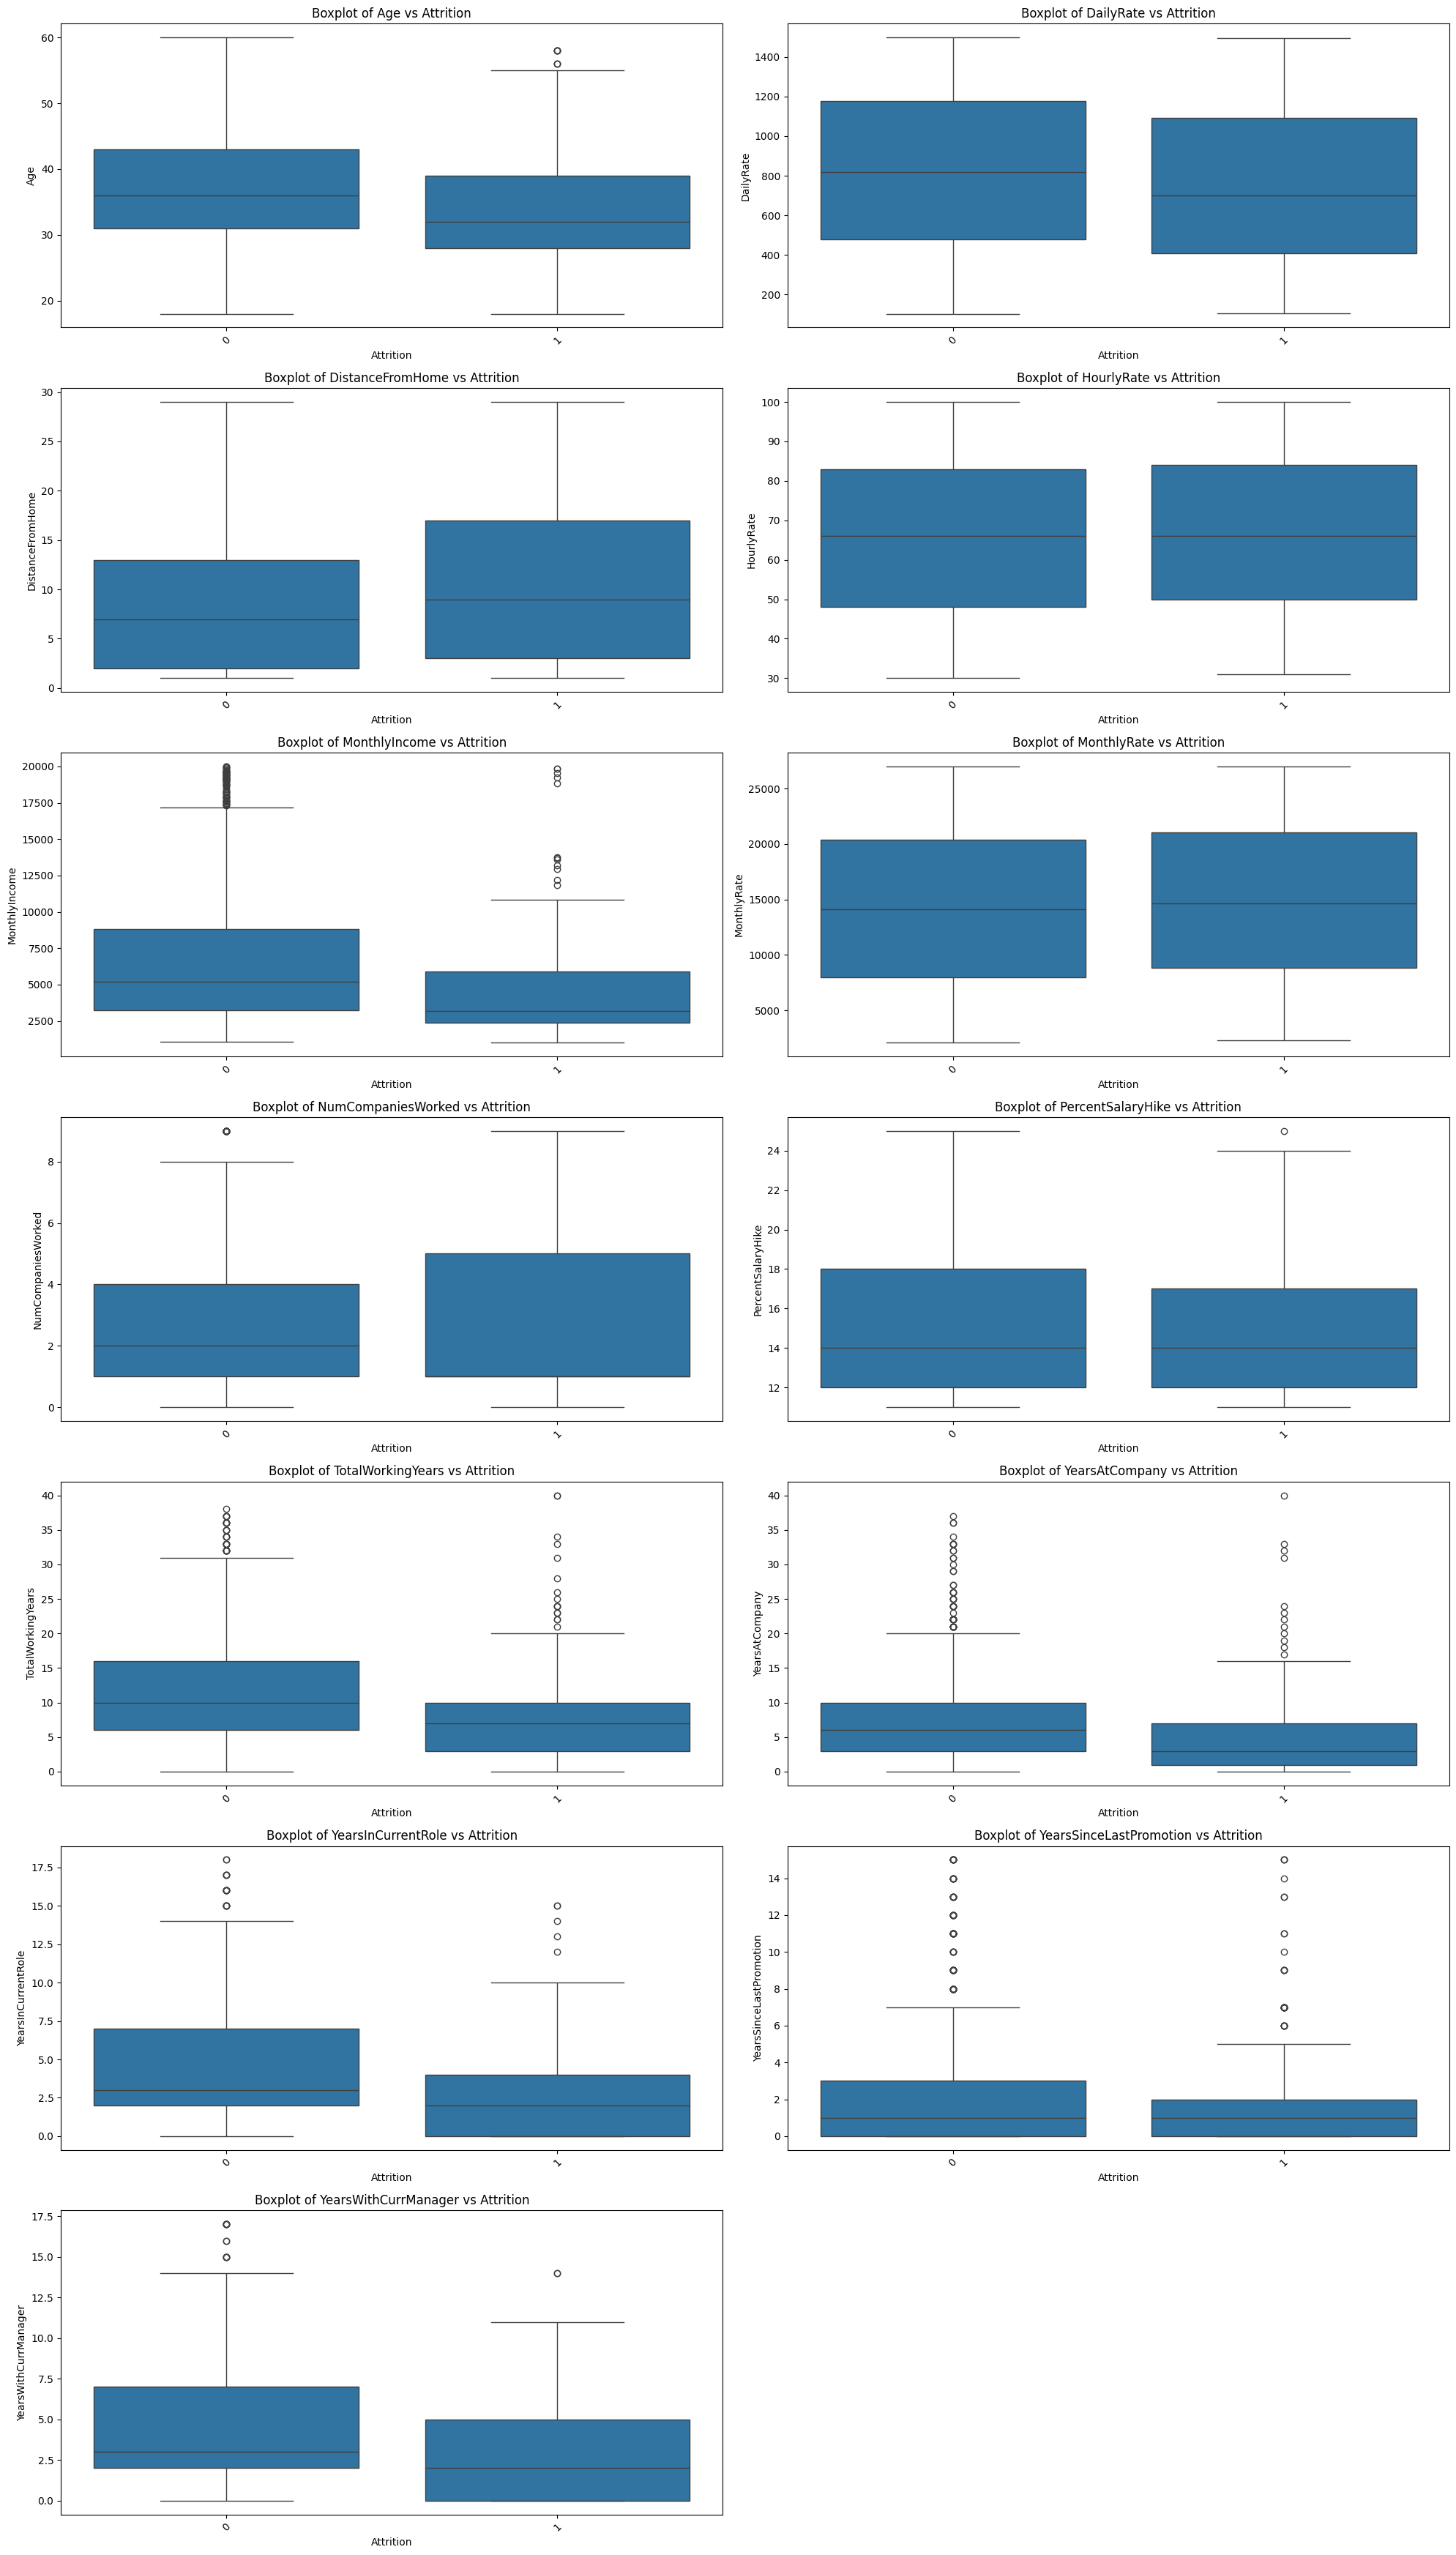

In [273]:
# Bivariate analysis for numarical cols with Attrition

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of numeric features
n = len(numerical_cols)

# Fix 2 columns per row
cols = 2

# Auto-calc rows
rows = math.ceil(n / cols)

# Auto figure size (height grows with rows)
plt.figure(figsize=(20, rows * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df_clean, x='Attrition', y=col)
    plt.title(f'Boxplot of {col} vs Attrition', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Detailed Inference from Numerical Features vs Attrition (Boxplots)

### Age
- Employees who left the company (Attrition = 1) are generally younger.
- Employees who stayed have a higher median age.
- This suggests that younger employees are more likely to leave.

### DailyRate
- The distribution is similar for both employees who stayed and left.
- No clear difference is observed, indicating a weak relationship with attrition.

### DistanceFromHome
- Employees who left tend to live slightly farther from the workplace.
- Longer commuting distance may contribute to higher attrition.

### HourlyRate
- Hourly rate shows almost identical distributions for both groups.
- This feature does not strongly influence attrition.

### MonthlyIncome
- Employees who stayed have a higher median monthly income.
- Employees who left are mostly in the lower income range.
- Lower income appears to be associated with higher attrition.
- Several outliers indicate income variability.

### MonthlyRate
- Monthly rate distributions are very similar for both groups.
- No strong impact on attrition is observed.

### NumCompaniesWorked
- Employees who left have worked in more companies previously.
- This suggests job-hopping behavior may increase attrition risk.

### PercentSalaryHike
- Salary hike percentages are similar for both groups.
- This feature alone does not clearly affect attrition.

### TotalWorkingYears
- Employees who stayed have more total working experience.
- Employees who left generally have fewer working years.
- Less experienced employees are more likely to leave.

### YearsAtCompany
- Employees who left typically have fewer years at the company.
- Longer tenure is associated with lower attrition.
- Some long-tenure outliers are visible among employees who stayed.

### YearsInCurrentRole
- Employees who left have spent less time in their current role.
- Longer role stability appears to reduce attrition.

### YearsSinceLastPromotion
- Distributions overlap for both groups, showing weak separation.
- Promotion-related factors may still influence attrition indirectly.

### YearsWithCurrManager
- Employees who left have spent less time with their current manager.
- Longer manager–employee relationships may help reduce attrition.


### **Overall Summary**
- Younger, less experienced, and lower-paid employees are more likely to leave.
- Career stability factors such as tenure, role duration, and manager association show a strong relationship with attrition.
- Short-term pay metrics (DailyRate, HourlyRate, MonthlyRate, Salary Hike) show minimal direct impact.
- Outliers are present in several features, reflecting real-world employee data variability.


# Stastical tests and Feature selection

### Chi2

In [274]:

from scipy.stats import chi2_contingency

for col in categorical_cols:
    table = pd.crosstab(df_clean[col], df_clean[target])
    
    chi2, p_value, dof, expected = chi2_contingency(table)
    
    if p_value < 0.05:
        print(col, ":", round(p_value, 4), ": Strong")
    else:
        print(col, ":", round(p_value, 4), ": Weak")



BusinessTravel : 0.0 : Strong
Department : 0.0045 : Strong
Education : 0.5455 : Weak
EducationField : 0.0068 : Strong
EnvironmentSatisfaction : 0.0001 : Strong
Gender : 0.2906 : Weak
JobInvolvement : 0.0 : Strong
JobLevel : 0.0 : Strong
JobRole : 0.0 : Strong
JobSatisfaction : 0.0006 : Strong
MaritalStatus : 0.0 : Strong
OverTime : 0.0 : Strong
PerformanceRating : 0.9901 : Weak
RelationshipSatisfaction : 0.155 : Weak
StockOptionLevel : 0.0 : Strong
TrainingTimesLastYear : 0.0191 : Strong
WorkLifeBalance : 0.001 : Strong


### ANOVA

In [275]:
from scipy.stats import f_oneway

target = "Attrition"

for col in numerical_cols:
    groups = []

    # Split numerical column into groups based on target (Yes/No)
    for level in df_clean[target].unique():
        groups.append(df_clean[df_clean[target] == level][col])

    # ANOVA F-test
    f_stat, p_value = f_oneway(*groups)

    # Print results
    print(f"Feature: {col}")
    print(f"  F-statistic = {f_stat:.4f}")
    print(f"  p-value     = {p_value:.6f}")

    # Strength logic
    if p_value < 0.05:
        print("  Result: STRONG \n")
    else:
        print("  Result: WEAK \n")


Feature: Age
  F-statistic = 38.1759
  p-value     = 0.000000
  Result: STRONG 

Feature: DailyRate
  F-statistic = 4.7266
  p-value     = 0.029858
  Result: STRONG 

Feature: DistanceFromHome
  F-statistic = 8.9683
  p-value     = 0.002793
  Result: STRONG 

Feature: HourlyRate
  F-statistic = 0.0688
  p-value     = 0.793135
  Result: WEAK 

Feature: MonthlyIncome
  F-statistic = 38.4888
  p-value     = 0.000000
  Result: STRONG 

Feature: MonthlyRate
  F-statistic = 0.3379
  p-value     = 0.561124
  Result: WEAK 

Feature: NumCompaniesWorked
  F-statistic = 2.7823
  p-value     = 0.095525
  Result: WEAK 

Feature: PercentSalaryHike
  F-statistic = 0.2667
  p-value     = 0.605613
  Result: WEAK 

Feature: TotalWorkingYears
  F-statistic = 44.2525
  p-value     = 0.000000
  Result: STRONG 

Feature: YearsAtCompany
  F-statistic = 27.0016
  p-value     = 0.000000
  Result: STRONG 

Feature: YearsInCurrentRole
  F-statistic = 38.8383
  p-value     = 0.000000
  Result: STRONG 

Feature: Y

**Final Feature Selection Based on Statistical Tests:**

Based on the statistical tests performed, all features with a **p-value less than 0.05** were considered statistically significant and therefore selected as **f_categorical_features** and  **f_numerical_features** for model building. This indicates that these features have a meaningful relationship with the target variable and can contribute effectively to predicting employee attrition.


In [276]:
s_categorical_features = [
    'BusinessTravel', 'Department', 'EducationField',
    'EnvironmentSatisfaction', 'JobInvolvement',
    'JobRole', 'JobSatisfaction', 'MaritalStatus',
    'OverTime', 'StockOptionLevel', 'WorkLifeBalance', 'JobLevel'
]

s_numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsWithCurrManager', 'YearsSinceLastPromotion',
    'TrainingTimesLastYear'
]


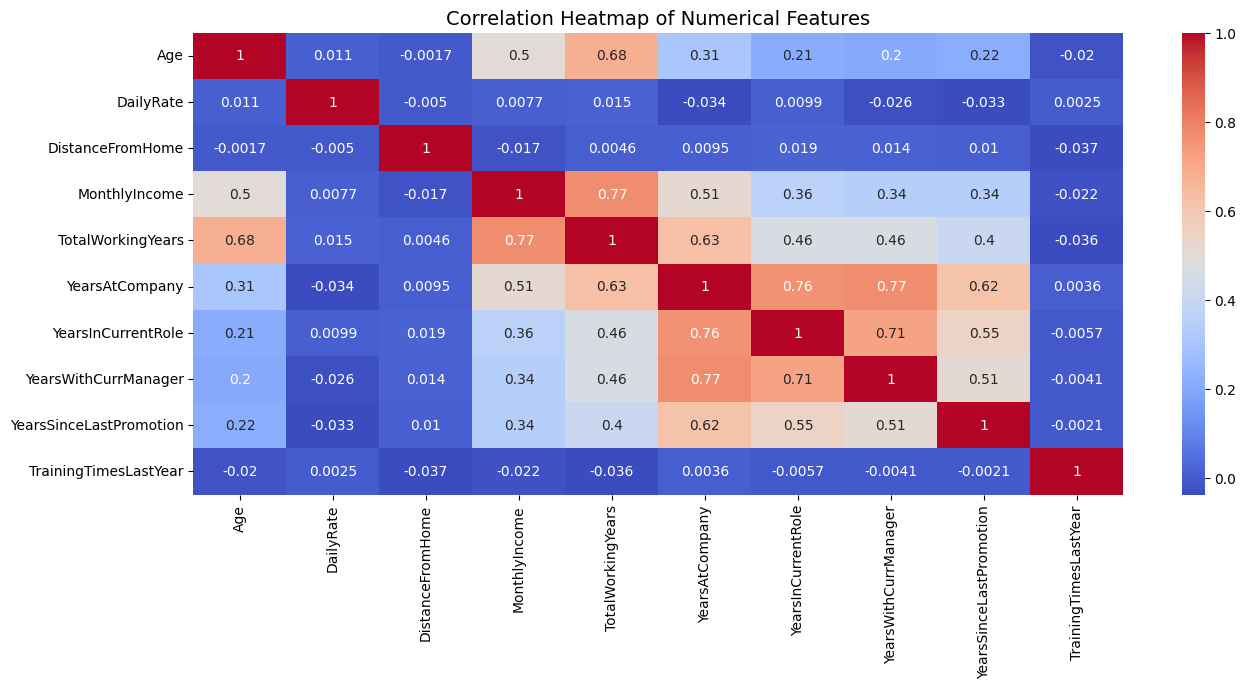

In [277]:
# Multicollinearity Analysis of Numerical Features

plt.figure(figsize=(15, 6))

sns.heatmap(
    df[s_numerical_features].corr(),
    annot=True,
    cmap="coolwarm",
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


In [278]:
# final selected features (updated)

f_numerical_features = [
    'Age',
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsWithCurrManager'
]

f_categorical_features = [
    'OverTime',
    'JobRole',
    'JobLevel',
    'EnvironmentSatisfaction',
    'WorkLifeBalance'
]


Based on the above correlation heatmap, no numerical features show a very high correlation with each other. Since there is no strong multicollinearity observed, all numerical features are retained for model training.

# Feature Engineering

In [279]:
# Categorical Encoding (Label + One-Hot)

binary_encoded_cols = []

for col in f_categorical_features:

    # Binary categorical → Label Encoding (0 / 1)
    if df_clean[col].nunique() == 2:
        df_clean[col] = pd.factorize(df_clean[col])[0]
        binary_encoded_cols.append(col)

    # Multi-class categorical → One-Hot Encoding
    elif 2 < df_clean[col].nunique() < 10:
        dummies = pd.get_dummies(df_clean[col], drop_first=False, prefix=col,dtype=int)
        df_clean = pd.concat([df_clean.drop(col, axis=1), dummies], axis=1)

# One-hot encoded columns
encoded_cols = [
    c for c in df_clean.columns
    if any(c.startswith(f + "_") for f in f_categorical_features)
]

# Final dataset (numerical + binary categorical + one-hot + target)
df_clean = df_clean[
    f_numerical_features + binary_encoded_cols + encoded_cols + ['Attrition']
]


### Categorical Encoding 

This code converts categorical data into numbers so that it can be used by machine learning models.

- If a column has only **two values** (for example, *Yes / No*), it is converted into **0 and 1**.
- If a column has **more than two values**, **one-hot encoding** is applied to create separate columns for each category, and the original column is removed.
- Finally, all **numerical features**, **encoded categorical features**, and the **target column (`Attrition`)** are combined to create the final dataset used for model training.


## Outlier Treatment

In [280]:
# Outlier treatent

df_out = df_clean.copy()

mask = pd.Series(True, index=df_out.index)

for col in f_numerical_features:
    features = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - features

    mask &= (
        (df_out[col] >= features - 1.5 * IQR) &
        (df_out[col] <= Q3 + 1.5 * IQR)
    )

df_out = df_out[mask].reset_index(drop=True)


## SMOTE

In [281]:
from imblearn.over_sampling import SMOTE
df_encoded = pd.get_dummies(df_out, drop_first=True)

x = df_encoded.drop([target], axis=1)
y = df_encoded[target]

sm = SMOTE(random_state=0)
x_sm, y_sm = sm.fit_resample(x, y)

## Train-Test-Split

In [282]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_sm, y_sm,
    test_size=0.20,
    random_state=42,
    stratify=y_sm
)

## Scaling

In [283]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaled = pd.DataFrame(
    std.fit_transform(x_train),
    columns=x_train.columns,
    index=x_train.index
)

x_test_scaled = pd.DataFrame(
    std.transform(x_test),
    columns=x_train.columns,
    index=x_test.index
)


# Model Evaluation and Performance Assessment

### Score Function

In [284]:
# classification summary (focused metrics)

from sklearn.metrics import (
    f1_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score
)
import pandas as pd

results_df = pd.DataFrame(columns=['model', 'recall_macro'])


def classification_summary(model, y_test, pred, pred_prob):
    print("\n--- model evaluation ---")
    print(f"model: {model.__class__.__name__}")

    # key metrics
    print("recall (yes):", round(recall_score(y_test, pred), 3))
    print("f1 score (macro):", round(f1_score(y_test, pred, average='macro'), 3))
    print("auc-roc:", round(roc_auc_score(y_test, pred_prob[:, 1]), 3))

    print("\nconfusion matrix:")
    print(confusion_matrix(y_test, pred))

    print("\nclassification report:")
    print(classification_report(y_test, pred))

    results_df.loc[len(results_df)] = [
        model.__class__.__name__,
        f1_score(y_test, pred, average='macro')
    ]


## Model Training

### Logistic regression

In [285]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

pred = model.predict(x_test_scaled)
pred_prob = model.predict_proba(x_test_scaled)

classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: LogisticRegression
recall (yes): 0.848
f1 score (macro): 0.9
auc-roc: 0.948

confusion matrix:
[[201  10]
 [ 32 179]]

classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       211
           1       0.95      0.85      0.90       211

    accuracy                           0.90       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.90      0.90      0.90       422



In [286]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)



--- model evaluation ---
model: DecisionTreeClassifier
recall (yes): 0.882
f1 score (macro): 0.87
auc-roc: 0.87

confusion matrix:
[[181  30]
 [ 25 186]]

classification report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       211
           1       0.86      0.88      0.87       211

    accuracy                           0.87       422
   macro avg       0.87      0.87      0.87       422
weighted avg       0.87      0.87      0.87       422



In [287]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)



--- model evaluation ---
model: RandomForestClassifier
recall (yes): 0.91
f1 score (macro): 0.917
auc-roc: 0.964

confusion matrix:
[[195  16]
 [ 19 192]]

classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       211
           1       0.92      0.91      0.92       211

    accuracy                           0.92       422
   macro avg       0.92      0.92      0.92       422
weighted avg       0.92      0.92      0.92       422



In [288]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: GradientBoostingClassifier
recall (yes): 0.872
f1 score (macro): 0.896
auc-roc: 0.952

confusion matrix:
[[194  17]
 [ 27 184]]

classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       211
           1       0.92      0.87      0.89       211

    accuracy                           0.90       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.90      0.90      0.90       422



In [289]:
# XGBoost

from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6
)

model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: XGBClassifier
recall (yes): 0.891
f1 score (macro): 0.91
auc-roc: 0.956

confusion matrix:
[[196  15]
 [ 23 188]]

classification report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       211
           1       0.93      0.89      0.91       211

    accuracy                           0.91       422
   macro avg       0.91      0.91      0.91       422
weighted avg       0.91      0.91      0.91       422



In [290]:
# LightGBM

from lightgbm import LGBMClassifier

model = LGBMClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    verbose=-1
)

model.fit(x_train, y_train)

pred = model.predict(x_test)
pred_prob = model.predict_proba(x_test)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)


--- model evaluation ---
model: LGBMClassifier
recall (yes): 0.9
f1 score (macro): 0.905
auc-roc: 0.955

confusion matrix:
[[192  19]
 [ 21 190]]

classification report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       211
           1       0.91      0.90      0.90       211

    accuracy                           0.91       422
   macro avg       0.91      0.91      0.91       422
weighted avg       0.91      0.91      0.91       422



In [291]:
# Support Vector Machine

from sklearn.svm import SVC

model = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

model.fit(x_train_scaled, y_train)

pred = model.predict(x_test_scaled)
pred_prob = model.predict_proba(x_test_scaled)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)



--- model evaluation ---
model: SVC
recall (yes): 0.825
f1 score (macro): 0.898
auc-roc: 0.956

confusion matrix:
[[205   6]
 [ 37 174]]

classification report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       211
           1       0.97      0.82      0.89       211

    accuracy                           0.90       422
   macro avg       0.91      0.90      0.90       422
weighted avg       0.91      0.90      0.90       422



In [292]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train on SCALED training data (recommended for GaussianNB)
model.fit(x_train_scaled, y_train)

# Predictions on SCALED test data
pred = model.predict(x_test_scaled)
pred_prob = model.predict_proba(x_test_scaled)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)



--- model evaluation ---
model: GaussianNB
recall (yes): 0.957
f1 score (macro): 0.562
auc-roc: 0.868

confusion matrix:
[[ 57 154]
 [  9 202]]

classification report:
              precision    recall  f1-score   support

           0       0.86      0.27      0.41       211
           1       0.57      0.96      0.71       211

    accuracy                           0.61       422
   macro avg       0.72      0.61      0.56       422
weighted avg       0.72      0.61      0.56       422



In [293]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"
)

model.fit(x_train_scaled, y_train)

pred = model.predict(x_test_scaled)
pred_prob = model.predict_proba(x_test_scaled)

# Evaluation
classification_summary(model, y_test, pred, pred_prob)



--- model evaluation ---
model: KNeighborsClassifier
recall (yes): 0.863
f1 score (macro): 0.886
auc-roc: 0.938

confusion matrix:
[[192  19]
 [ 29 182]]

classification report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       211
           1       0.91      0.86      0.88       211

    accuracy                           0.89       422
   macro avg       0.89      0.89      0.89       422
weighted avg       0.89      0.89      0.89       422



## Normal training results

In [294]:
results_df.sort_values(by='recall_macro', ascending=False)

,model,recall_macro
2,RandomForestClassifier,0.917057
4,XGBClassifier,0.909920
5,LGBMClassifier,0.905211
0,LogisticRegression,0.900203
6,SVC,0.897551
3,GradientBoostingClassifier,0.895676
8,KNeighborsClassifier,0.886192
1,DecisionTreeClassifier,0.869650
7,GaussianNB,0.562037


In [295]:
# get best model based on recall_macro

results_df_sorted = results_df.sort_values(by="recall_macro", ascending=False)

best_model = results_df_sorted.iloc[0]["model"]

print(best_model)


RandomForestClassifier


Based on the model training results, the RandomForestClassifier achieved the highest performance score; therefore, it has been selected as the best-performing model.

In [361]:
best_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

In [362]:
best_model.fit(x_train, y_train)

pred = best_model.predict(x)

df_encoded["predection"] = pred
df_encoded

df_encoded.to_csv(r"D:\Guvi\Project\Employee_Attrition\df_predicted.csv")

In [ ]:
# save the best trained model as a pickle file

import pickle

file_path = (r"D:\Guvi\Project\Employee_Attrition\best_model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(best_model, f)

In [368]:
import pandas as pd
import pickle
# Trained
df_predicted = pd.read_csv(r"D:\Guvi\Project\Employee_Attrition\df_predicted.csv")
xf = df_predicted.drop(columns=['Attrition', 'predection'])

pred_model = best_model.predict(xf)

file_path = r"D:\Guvi\Project\Employee_Attrition\best_model.pkl"

with open(file_path, "rb") as f:
    ml = pickle.load(f)

pred_pkl = ml.predict(xf)

In [369]:
same_predictions = np.array_equal(pred_model, pred_pkl)

print("Are model predictions and pickle predictions identical?")
print(same_predictions)


Are model predictions and pickle predictions identical?
True
